# Assign3: Non-Linear Dimensionality Reduction - KPCA

# Importing Dependancies

In [103]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import copy
warnings.filterwarnings("ignore")

# Reading Dataset

In [104]:
# read data into dataframe
df = pd.read_csv("./OnlineNewsPopularity.csv") 

# Drop Unused Features

Ignore the following attributes for this assignment: 0-1, 4-6, 13-38, and 60 (counting from 0)

In [105]:
# drop unused features
vals = [0, 1, 4, 5, 6, 60]
for i in range(13, 39):
    vals.append(i)

df = df.drop(df.columns[vals], axis = 1)
df.head()

,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,LDA_00,LDA_01,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,4.0,2.0,1.0,0.0,4.680365,5.0,0.500331,0.378279,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,3.0,1.0,1.0,0.0,4.913725,4.0,0.799756,0.050047,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,3.0,1.0,1.0,0.0,4.393365,6.0,0.217792,0.033334,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,9.0,0.0,1.0,0.0,4.404896,7.0,0.028573,0.419300,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,19.0,19.0,20.0,0.0,4.682836,7.0,0.028633,0.028794,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


# Drop Unused Data Points
 
We will only use the first 5000 data points

In [106]:
df = df.iloc[:5000]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    n_tokens_title                5000 non-null   float64
 1    n_tokens_content              5000 non-null   float64
 2    num_hrefs                     5000 non-null   float64
 3    num_self_hrefs                5000 non-null   float64
 4    num_imgs                      5000 non-null   float64
 5    num_videos                    5000 non-null   float64
 6    average_token_length          5000 non-null   float64
 7    num_keywords                  5000 non-null   float64
 8    LDA_00                        5000 non-null   float64
 9    LDA_01                        5000 non-null   float64
 10   LDA_02                        5000 non-null   float64
 11   LDA_03                        5000 non-null   float64
 12   LDA_04                        5000 non-null   f

Based on the dataframe info, we now have 29 features remaining and the first 5000 points remaining. 

# Compute Kernel Matrix

**save data as numpy array**

In [107]:
data = df.to_numpy()
data[:5]

array([[ 1.20000000e+01,  2.19000000e+02,  4.00000000e+00,
         2.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         4.68036530e+00,  5.00000000e+00,  5.00331204e-01,
         3.78278930e-01,  4.00046751e-02,  4.12626477e-02,
         4.01225435e-02,  5.21617145e-01,  9.25619835e-02,
         4.56621005e-02,  1.36986301e-02,  7.69230769e-01,
         2.30769231e-01,  3.78636364e-01,  1.00000000e-01,
         7.00000000e-01, -3.50000000e-01, -6.00000000e-01,
        -2.00000000e-01,  5.00000000e-01, -1.87500000e-01,
         0.00000000e+00,  1.87500000e-01],
       [ 9.00000000e+00,  2.55000000e+02,  3.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         4.91372549e+00,  4.00000000e+00,  7.99755687e-01,
         5.00466754e-02,  5.00962518e-02,  5.01006734e-02,
         5.00007119e-02,  3.41245791e-01,  1.48947811e-01,
         4.31372549e-02,  1.56862745e-02,  7.33333333e-01,
         2.66666667e-01,  2.86914601e-01,  3.33333333e-02,
         7.00

In [108]:
print(data.shape)

(5000, 29)


**Compute Kernel Matrix** where each K(xi, xj) is = xi * xj

In [129]:
kernel = np.dot(data, data.T)

In [130]:
kernel = np.array(kernel)
print(kernel.shape)

(5000, 5000)


Now kernel is an nxn matrix made of dot products between data points

# Center Kernel Matrix

Get the nxn identity matrix

In [111]:
I = np.identity(len(kernel))
I

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Get the ones matrix

In [112]:
ones = np.ones((len(kernel), len(kernel)))
ones

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [113]:
# divide ones matrix by n
O = ones / len(kernel)
O

array([[0.0002, 0.0002, 0.0002, ..., 0.0002, 0.0002, 0.0002],
       [0.0002, 0.0002, 0.0002, ..., 0.0002, 0.0002, 0.0002],
       [0.0002, 0.0002, 0.0002, ..., 0.0002, 0.0002, 0.0002],
       ...,
       [0.0002, 0.0002, 0.0002, ..., 0.0002, 0.0002, 0.0002],
       [0.0002, 0.0002, 0.0002, ..., 0.0002, 0.0002, 0.0002],
       [0.0002, 0.0002, 0.0002, ..., 0.0002, 0.0002, 0.0002]])

Each element is 1/n, where n = 5000

Store the difference of I - ones/n into a matrix

In [114]:
diff = I - O
diff

array([[ 9.998e-01, -2.000e-04, -2.000e-04, ..., -2.000e-04, -2.000e-04,
        -2.000e-04],
       [-2.000e-04,  9.998e-01, -2.000e-04, ..., -2.000e-04, -2.000e-04,
        -2.000e-04],
       [-2.000e-04, -2.000e-04,  9.998e-01, ..., -2.000e-04, -2.000e-04,
        -2.000e-04],
       ...,
       [-2.000e-04, -2.000e-04, -2.000e-04, ...,  9.998e-01, -2.000e-04,
        -2.000e-04],
       [-2.000e-04, -2.000e-04, -2.000e-04, ..., -2.000e-04,  9.998e-01,
        -2.000e-04],
       [-2.000e-04, -2.000e-04, -2.000e-04, ..., -2.000e-04, -2.000e-04,
         9.998e-01]])

Now we can center the Kernel matrix. The centered kernel matrix is the following matrix multiplication: diff * K * diff

Both diff and K metrices are nxn, so the resulting matrix will be the centered nxn kernel matrix

In [115]:
kernel_center =  np.matmul(np.matmul(diff, kernel), diff)
kernel_center

array([[  66960.97071963,   57650.74971404,   69027.59359944, ...,
          34330.4990171 ,   48064.9373983 , -185826.62361056],
       [  57650.74971404,   49649.69140655,   59439.75878584, ...,
          29551.93376277,   41383.20271813, -159958.314801  ],
       [  69027.59359944,   59439.75878584,   71171.74359628, ...,
          35389.1439709 ,   49554.6622794 , -191573.16910162],
       ...,
       [  34330.4990171 ,   29551.93376277,   35389.1439709 , ...,
          17667.79558324,   24651.92480261,  -95348.19578332],
       [  48064.9373983 ,   41383.20271813,   49554.6622794 , ...,
          24651.92480261,   34560.77086859, -133413.55888478],
       [-185826.62361056, -159958.314801  , -191573.16910162, ...,
         -95348.19578332, -133413.55888478,  516065.81889657]])

New centered matrix is still nxn

In [116]:
kernel_center.shape

(5000, 5000)

# Get Principle Components

Get the eigenvalues and eigenvectors of the centered kernel matrix

In [135]:
w,v = np.linalg.eigh(kernel_center)
w

array([-1.17353374e-06, -1.00545956e-06, -8.59349930e-07, ...,
        1.96903072e+05,  4.05289396e+05,  7.81097812e+08])

Replace 0 or near 0 negative values with a near 0 positive value. We are looking for the most dominant eigenvectors so the ones closest to 0 are of little interest to us. 

In [139]:
for i in range(len(w)):
    if w[i] <= 0:
        w[i] = np.abs(w[i])
w


array([1.17353374e-06, 1.00545956e-06, 8.59349930e-07, ...,
       1.96903072e+05, 4.05289396e+05, 7.81097812e+08])

Use eigenvalues to get variances for each component

divide each eigenvalue by n 

In [140]:
eigenvals = w / len(kernel)
eigenvals

array([2.34706748e-10, 2.01091912e-10, 1.71869986e-10, ...,
       3.93806145e+01, 8.10578793e+01, 1.56219562e+05])

Divide eigen vectors by one over the root of the eigenvalues

In [153]:
factor = np.ones((5000,)) / np.sqrt(w)
factor

array([9.23107352e+02, 9.97281346e+02, 1.07873551e+03, ...,
       2.25358402e-03, 1.57078729e-03, 3.57805728e-05])

In [156]:
# eigenvectors are returned as column vectors, but the multiplication operation multiplies through rows
# so we need to transpose the matrix of eigenvectors before multiplying, then transpose back
c = (factor * v)
c.shape

(5000, 5000)

Get the total variance by taking the summation of the eignevalues

In [157]:
tot_var = sum(eigenvals)
print(tot_var)
print(eigenvals[len(eigenvals)-1])

156387.71347255257
156219.56242413723


Determine how many Principle Components capture 95% of the variance

In [158]:
count = 0
captured_var = 0
for i in range(len(eigenvals)-1, 0, -1):
    count += 1
    captured_var += eigenvals[i]
    if captured_var / tot_var >= 0.95:
        break


print(count)

1


# Project the points along the first 2 PCs

Project along the first PC

In [159]:
a1 = np.dot(c[:, len(c)-1:].T, kernel_center)

Project along the second PC

In [160]:
a2 = np.dot(c[:, len(c)-2:len(c)-1].T, kernel_center)

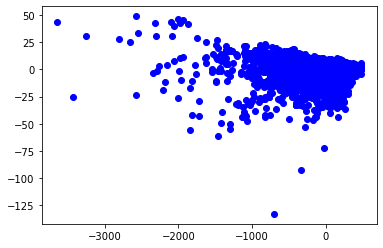

In [161]:
plt.scatter(a1, a2, c ="blue")

# To show the plot
plt.show()

# Regular PCA

First compute covariance matrix

In [66]:
cov = np.cov(data, rowvar=False, bias=True)

Get the first two PCs using eigh 

In [67]:
w2, v2 = np.linalg.eigh(cov)

In [68]:
eig1 = v2[:, len(v2)-1]
eig2 = v2[:, len(v2)-2]
eigs = np.vstack((eig1, eig2))
eigs

array([[ 2.20243272e-04, -9.99893211e-01, -1.22603930e-02,
        -4.08888298e-03, -6.20881577e-03, -2.74091544e-03,
        -8.25243634e-05, -4.95153260e-04, -2.90924756e-05,
         2.87324497e-05, -1.24312453e-05,  6.85553040e-05,
        -5.57640327e-05, -1.61157663e-05, -6.25784156e-06,
        -5.14211555e-06, -2.00280577e-06, -1.93246207e-05,
        -5.75335189e-06, -1.78168925e-05,  5.65700572e-05,
        -2.40934799e-04,  3.28814700e-05,  2.99523761e-04,
        -6.07934078e-05,  1.16097729e-05, -2.43479948e-05,
        -2.58885643e-05, -5.10820661e-06],
       [ 1.07170147e-02,  1.36581605e-02, -8.90901620e-01,
        -2.39752020e-01, -3.50607378e-01,  1.58744897e-01,
        -7.18987841e-03, -1.70024520e-02,  1.75446598e-03,
         5.13730813e-06,  2.07700522e-03, -4.76322527e-03,
         9.26616763e-04, -1.18453651e-03, -1.08223238e-03,
         4.31175357e-05,  9.28611769e-05, -8.60941525e-04,
         5.21247992e-04, -9.74955126e-04, -1.36720954e-04,
        -1.96

**Center the data**

First get the mean vector

In [69]:
mean = np.mean(data, axis=0)

Subtract the mean from the data

In [70]:
center_data = data - mean

Project data onto each new axis

In [72]:
new_data = np.dot(center_data, eigs.T)

Plot new points

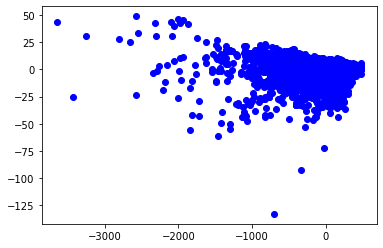

In [74]:
plt.scatter(new_data[:, 0], new_data[:, 1], c ="blue")

# To show the plot
plt.show()